<a href="https://colab.research.google.com/github/joaovitorcg04/Projeto_de_Redes_Neurais_Artificiais_para_IoT/blob/main/Projeto_de_Redes_Neurais_Artificiais_para_IoT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import zipfile
import tensorflow as tf
from tensorflow import keras
import numpy as np
import requests
import matplotlib.pyplot as plt

In [ ]:
path_to_zip = tf.keras.utils.get_file(
    'cats_and_dogs.zip',
    origin='https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip',
    extract=False
)


with zipfile.ZipFile(path_to_zip, 'r') as zip_ref:
    zip_ref.extractall('/content')


base_dir = '/content/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

BATCH_SIZE = 32
IMG_SIZE = (160, 160)


train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            label_mode='binary',
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 label_mode='binary',
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [ ]:
data_augmentation = tf.keras.Sequential(
  [
    layers.RandomFlip("horizontal", input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [ ]:
IMG_SHAPE = IMG_SIZE + (3,)

base_model = tf.keras.applications.EfficientNetV2B0(input_shape=IMG_SHAPE,
                                                    include_top=False, weights='imagenet')

base_model.trainable = False

preprocess_input = tf.keras.applications.efficientnet_v2.preprocess_input

inputs = tf.keras.Input(shape=IMG_SHAPE)
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)

# MUDANÇA PRINCIPAL: Adicionamos activation='sigmoid'
# Agora a saída será uma probabilidade entre 0 (gato) e 1 (cachorro)
outputs = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)

print("Modelo reconstruído com a camada Sigmoid!")

Modelo reconstruído com a camada Sigmoid!


In [ ]:
# --- NOVA CÉLULA DE COMPILAÇÃO DO MODELO ---

# Usamos a 'binary_crossentropy' padrão pois o sigmoid já está no modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy', # MUDANÇA AQUI
              metrics=['accuracy'])

print("Modelo recompilado!")
model.summary()

Modelo recompilado!


Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_19 (InputLayer)     │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_5 (Sequential)       │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-b0 (Functional)  │ (None, 5, 5, 1280)     │     5,919,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_6      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,920,593 (22.59 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 5,919,312 (22.58 MB)

In [ ]:
EPOCHS = 50
history = model.fit(train_dataset, epochs=EPOCHS, validation_data=validation_dataset)

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 108ms/step - accuracy: 0.8173 - loss: 0.4474 - val_accuracy: 0.9760 - val_loss: 0.1355
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - accuracy: 0.9636 - loss: 0.1469 - val_accuracy: 0.9820 - val_loss: 0.0858
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.9571 - loss: 0.1240 - val_accuracy: 0.9830 - val_loss: 0.0668
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.9707 - loss: 0.0960 - val_accuracy: 0.9840 - val_loss: 0.0570
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - accuracy: 0.9700 - loss: 0.0873 - val_accuracy: 0.9870 - val_loss: 0.0501
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.9767 - loss: 0.0731 - val_accuracy: 0.9860 - val_loss: 0.0467
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.9755 - loss: 0.0702 - val_accuracy: 0.9890 - val_loss: 0.0441
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.9763 - loss: 0.0775 - val_accuracy: 0.9910 -

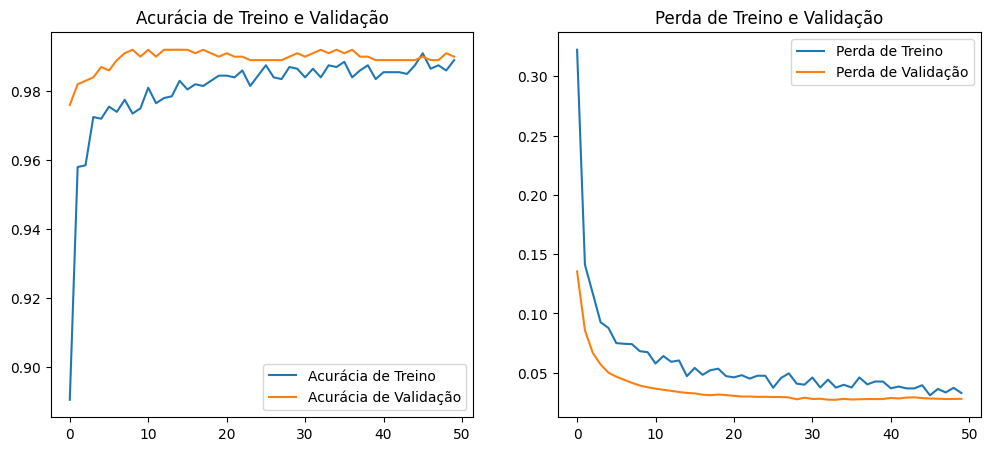

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Acurácia de Treino')
plt.plot(epochs_range, val_acc, label='Acurácia de Validação')
plt.legend(loc='lower right')
plt.title('Acurácia de Treino e Validação')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Perda de Treino')
plt.plot(epochs_range, val_loss, label='Perda de Validação')
plt.legend(loc='upper right')
plt.title('Perda de Treino e Validação')
plt.show()

In [ ]:
# Area de Testes

def predict_image_from_path(file_path):

    try:

        img = tf.keras.utils.load_img(file_path, target_size=IMG_SIZE)

        img_array = tf.keras.utils.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0)

        predictions = model.predict(img_array)
        score = predictions[0][0]


        plt.imshow(img)
        plt.axis('off')

        # Interpreta o resultado
        if score >= 0.5:
            print(f"É um cachorro! (Pontuação: {score:.2f})")
        else:
            print(f"É um gato! (Pontuação: {score:.2f})")

    except FileNotFoundError:
        print(f"ERRO: Arquivo não encontrado! Verifique se o caminho '{file_path}' está correto.")
    except Exception as e:
        print(f"Não foi possível processar a imagem. Erro: {e}")

In [ ]:
# Coloque sua imagem aqui
image_path = "/content/6d1e36f9-821d-41f0-b7d5-15d5bd654593.jpg"
predict_image_from_path(image_path)

Não foi possível processar a imagem. Erro: name 'tf' is not defined
